<a href="https://colab.research.google.com/github/nhungab/doanhso/blob/main/BT_l%E1%BB%9Bn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Item_Identifier: Đây là mã định danh độc nhất cho từng mặt hàng trong cửa hàng Big Mart.
## Item_Weight: Trọng lượng của mỗi mặt hàng. Đây là thông tin về trọng lượng của sản phẩm.
# Item_Fat_Content: Loại mỡ của mặt hàng. Thường có các giá trị như 'Low Fat', 'Regular', có thể được sử dụng để phân loại sản phẩm theo hàm lượng mỡ.
## Item_Visibility: Là tỷ lệ diện tích mặt hàng trên kệ so với tổng diện tích của tất cả các mặt hàng trong cửa hàng. Đây là một chỉ số quan trọng để hiểu mức độ hiển thị của sản phẩm trên kệ.
# Item_Type: Loại sản phẩm.
## Item_MRP: Giá bán lẻ khuyến nghị của mỗi mặt hàng.
# Outlet_Identifier: Định danh duy nhất cho mỗi cửa hàng bán lẻ.
## Outlet_Establishment_Year: Năm thành lập của cửa hàng bán lẻ.
# Outlet_Size: Kích thước của cửa hàng bán lẻ, có thể là 'Small', 'Medium', hoặc 'Large'.
# Outlet_Location_Type: Loại vị trí của cửa hàng bán lẻ, có thể là 'Tier 1', 'Tier 2', hoặc 'Tier 3'.
# Outlet_Type: Loại cửa hàng bán lẻ, ví dụ: cửa hàng siêu thị, cửa hàng tạp hóa, vv.
## Item_Outlet_Sales: Doanh số bán hàng cho mỗi mặt hàng tại mỗi cửa hàng bán lẻ.


In [ ]:
#import thư viện
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc file .csv, hiển thị
bigmart = pd.read_csv('/content/drive/MyDrive/nhạp môn học máy/BigMart_Data.csv')
bigmart.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Kiem tra kieu du lieu
bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
bigmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# kiem tra gia tri thieu
bigmart.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
num = [cols for cols in bigmart.columns if bigmart[cols].dtypes in ['int64','float64']]
# Dien cac gia tri bi thieu
for cols in num:
    k = bigmart[cols].median()
    if (bigmart[cols].isnull().sum() != 0):
        bigmart[cols].fillna(k, inplace=True)
bigmart.isnull().sum()


,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
outlet_size_mode = bigmart.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
miss_bool = bigmart['Outlet_Size'].isnull()
bigmart.loc[miss_bool, 'Outlet_Size'] = bigmart.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
bigmart['Outlet_Size'].value_counts()

,count
Outlet_Size,
Small,4798
Medium,2793
High,932


#Visualization
Visualizing different Outlet Sizes

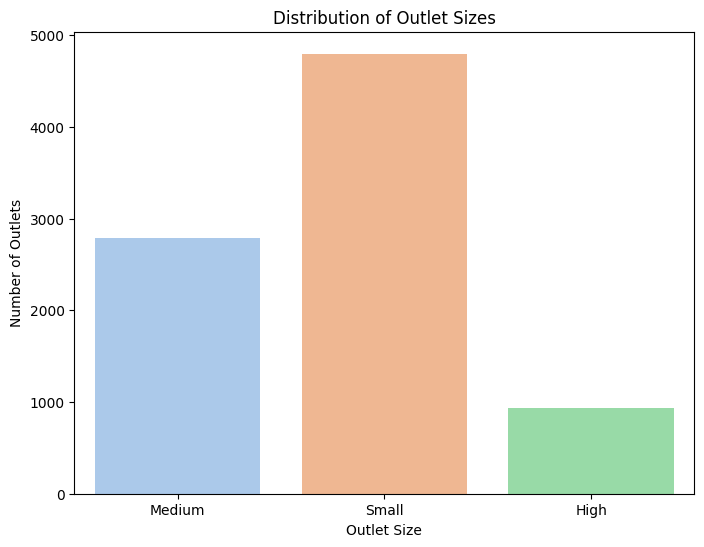

Hinh 1. Từ biểu đồ trên, chúng ta có thể hiểu rằng Big Mart có nhiều Cửa hàng Trung bình hơn.


In [ ]:
size_counts = bigmart['Outlet_Size'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(data=bigmart, x='Outlet_Size', palette='pastel')
plt.title('Distribution of Outlet Sizes')
plt.xlabel('Outlet Size')
plt.ylabel('Number of Outlets')
plt.show()

print("Hinh 1. Từ biểu đồ trên, chúng ta có thể hiểu rằng Big Mart có nhiều Cửa hàng Trung bình hơn.")

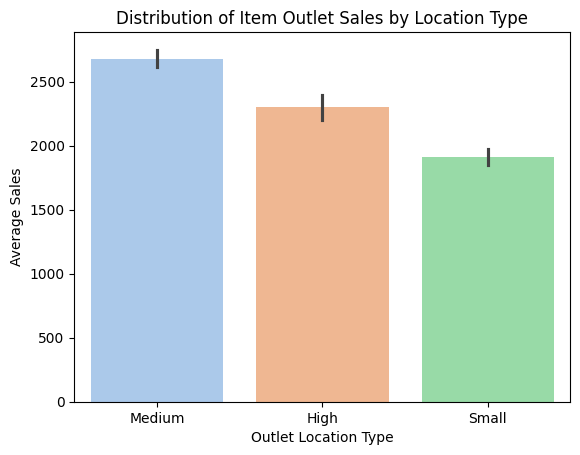

In [ ]:
###
sns.barplot(x="Outlet_Size", y="Item_Outlet_Sales", data=bigmart, palette="pastel",hue="Outlet_Size", legend=False)
plt.title("Distribution of Item Outlet Sales by Location Type")
plt.ylabel("Average Sales")
plt.xlabel("Outlet Location Type")
plt.show()

### Visualizing Outlet Establishments Years.

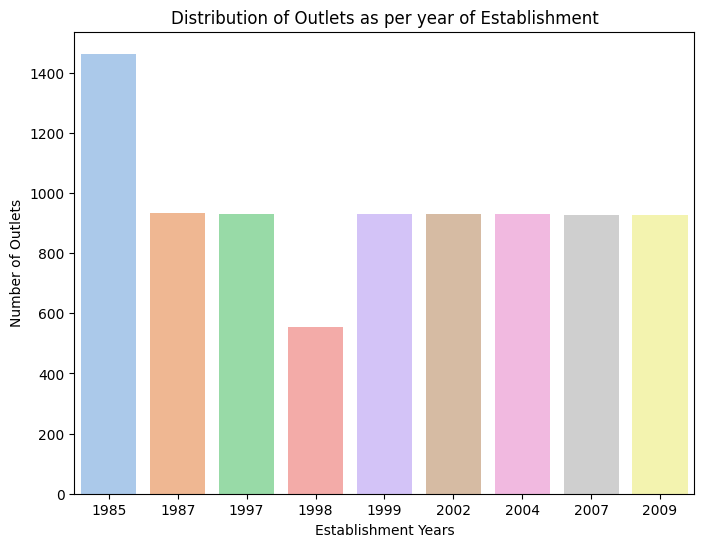

Hinh 2: Từ biểu đồ trên, chúng ta có thể hiểu rằng Big Mart đã mở cửa hàng tối đa ngay trong năm đầu tiên thành lập, đó là năm 1985.


In [ ]:
size_counts = bigmart['Outlet_Establishment_Year'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(data=bigmart, x='Outlet_Establishment_Year', palette='pastel')
plt.title('Distribution of Outlets as per year of Establishment')
plt.xlabel('Establishment Years')
plt.ylabel('Number of Outlets')
plt.show()

print("Hinh 2: Từ biểu đồ trên, chúng ta có thể hiểu rằng Big Mart đã mở cửa hàng tối đa ngay trong năm đầu tiên thành lập, đó là năm 1985.")

### Visualizing the Outlet Type

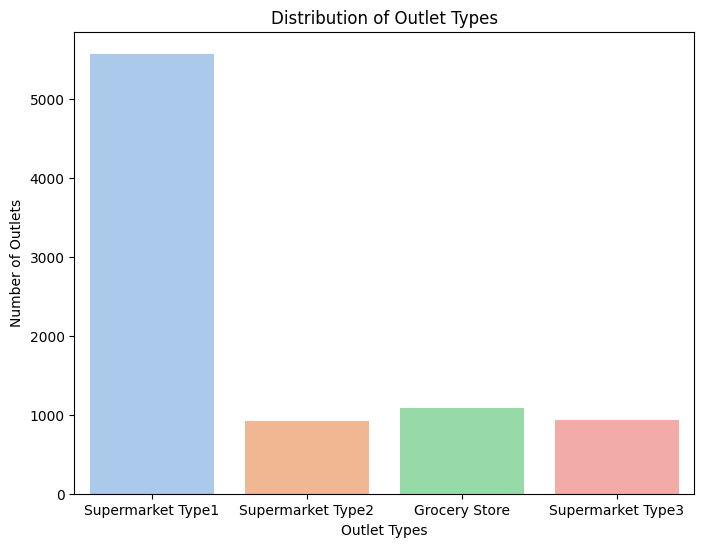

Hinh 3. Từ biểu đồ trên, chúng ta có thể nói rằng Big Mart có số lượng Supermarket Type1 nhiều hơn.


In [ ]:
size_counts = bigmart['Outlet_Type'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(data=bigmart, x='Outlet_Type', palette='pastel')
plt.title('Distribution of Outlet Types')
plt.xlabel('Outlet Types')
plt.ylabel('Number of Outlets')
plt.show()

print("Hinh 3. Từ biểu đồ trên, chúng ta có thể nói rằng Big Mart có số lượng Supermarket Type1 nhiều hơn.")

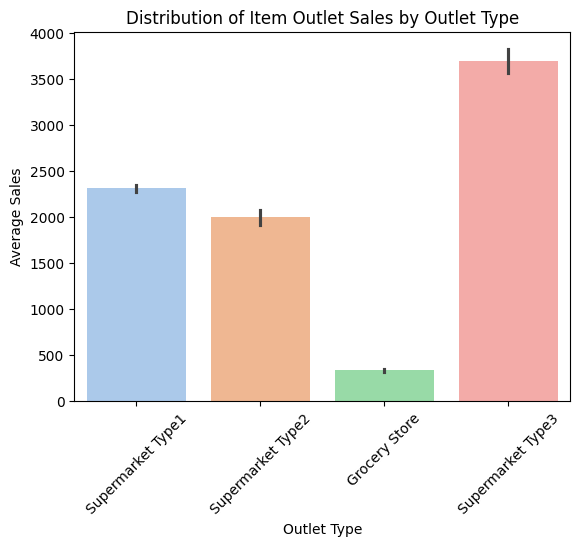

In [ ]:
###
sns.barplot(x="Outlet_Type", y="Item_Outlet_Sales", data=bigmart, palette="pastel",hue="Outlet_Type", legend=False)
plt.title("Distribution of Item Outlet Sales by Outlet Type")
plt.ylabel("Average Sales")
plt.xlabel("Outlet Type")
plt.xticks(rotation=45)
plt.show()

### Visualizing the Item Type

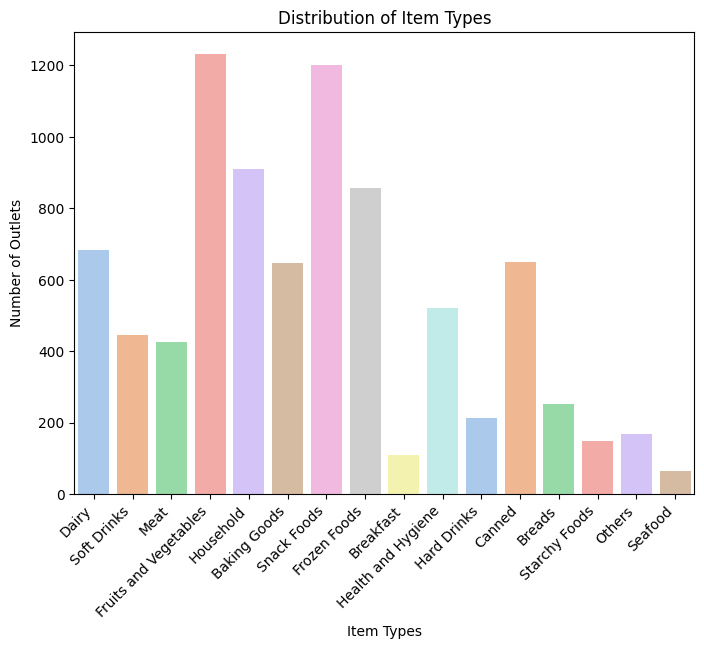

Hinh 4. Từ hình trên, chúng ta có thể hiểu rằng Snack Foods Outlet có số lượng nhiều hơn, tiếp theo là Fruits & Vegetables Outlets.


In [ ]:
size_counts = bigmart['Item_Type'].value_counts()

plt.figure(figsize=(8, 6))
plot = sns.countplot(data=bigmart, x='Item_Type', palette='pastel')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Distribution of Item Types')
plt.xlabel('Item Types')
plt.ylabel('Number of Outlets')
plt.show()

print("Hinh 4. Từ hình trên, chúng ta có thể hiểu rằng Fruits & Vegetables Outlets Outlet có số lượng nhiều hơn, tiếp theo là Snack Foods.")

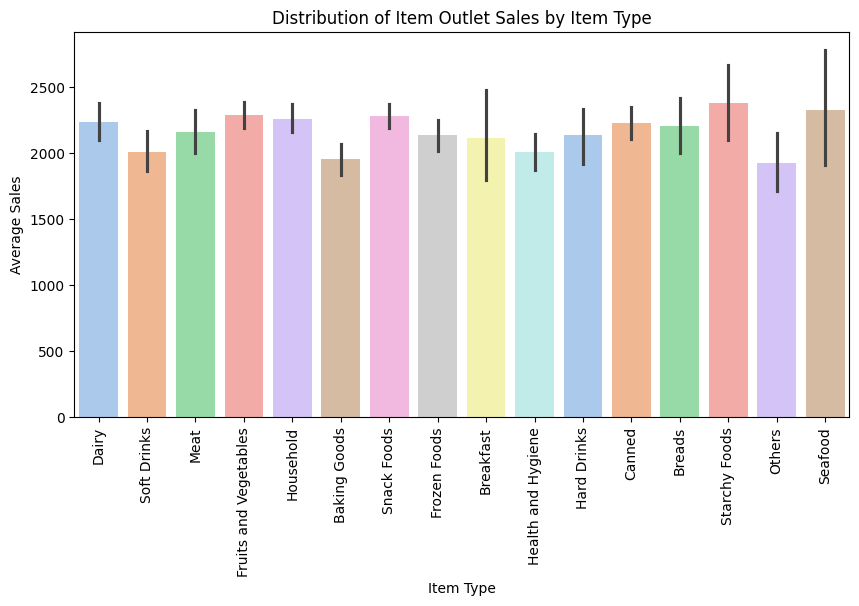

In [ ]:
###
plt.figure(figsize=(10, 5))
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=bigmart, palette="pastel",hue="Item_Type", legend=False)
plt.title("Distribution of Item Outlet Sales by Item Type")
plt.ylabel("Average Sales")
plt.xlabel("Item Type")
plt.xticks(rotation=90)
plt.show()

### Visualization of Outlets as per the Tier Cities.

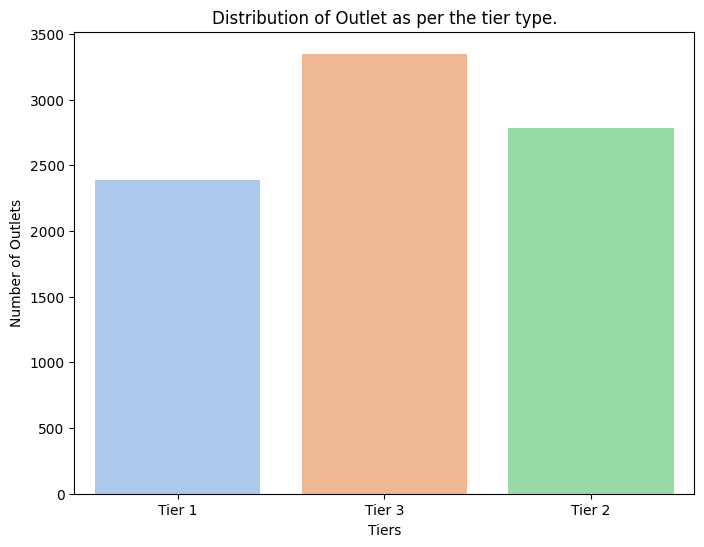

Hinh 5. Từ hình trên, chúng ta có thể hiểu rằng Big Mart có nhiều cửa hàng ở Tier 2 hơn.


In [ ]:
size_counts = bigmart['Outlet_Location_Type'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(data=bigmart, x='Outlet_Location_Type', palette='pastel')
plt.title('Distribution of Outlet as per the tier type.')
plt.xlabel('Tiers')
plt.ylabel('Number of Outlets')
plt.show()

print("Hinh 5. Từ hình trên, chúng ta có thể hiểu rằng Big Mart có nhiều cửa hàng ở Tier 3 hơn.")

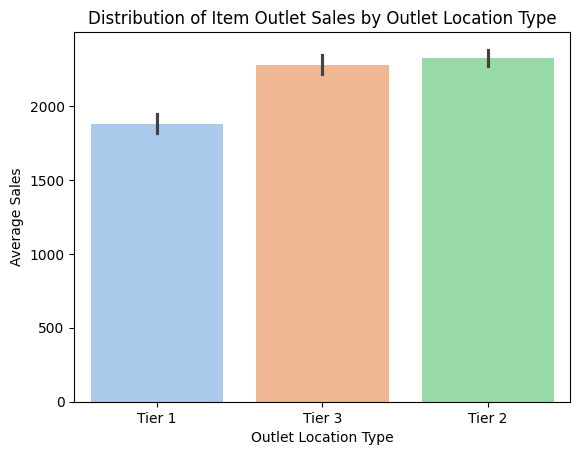

In [ ]:
###
sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=bigmart, palette="pastel",hue="Outlet_Location_Type", legend=False)
plt.title("Distribution of Item Outlet Sales by Outlet Location Type")
plt.ylabel("Average Sales")
plt.xlabel("Outlet Location Type")
plt.show()

In [ ]:
# Thay thế các chữ chưa chuẩn
def title(x):
    if x=='LF':
        return 'Low Fat'
    elif x == 'reg':
        return 'Regular'
    elif x == 'low fat':
        return 'Low Fat'
    else:
        x = x
    return x

bigmart.loc[:, 'Item_Fat_Content'] = bigmart['Item_Fat_Content'].apply(lambda x: title(x))
#bigmart['Item_Fat_Content'].value_counts()

### Visualizing the Item_Fat_Content


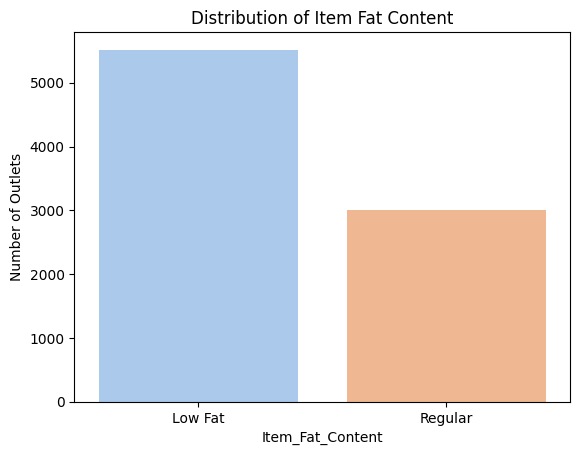

Hinh 6. Từ hình trên, chúng ta có thể hiểu rằng Big Mart sản phẩm ít chất béo được ưu chuộng hơn.


In [ ]:
sns.countplot(x="Item_Fat_Content",data=bigmart, palette="pastel", hue="Item_Fat_Content", legend=False)
plt.title("Distribution of Item Fat Content")
plt.ylabel('Number of Outlets')
plt.show()

print("Hinh 6. Từ hình trên, chúng ta có thể hiểu rằng Big Mart sản phẩm ít chất béo được ưu chuộng hơn.")

In [ ]:
bigmart.loc[:, 'Item_Visibility'].replace([0], [bigmart['Item_Visibility'].mean()], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in cat_col:
    bigmart[col] = LabelEncoder().fit_transform(bigmart[col])

In [ ]:
bigmart['Outlet_Identifier'] = LabelEncoder().fit_transform(bigmart['Outlet_Identifier'])

In [ ]:
cereal_corr = bigmart.select_dtypes(include='number').corr()
cereal_corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.023238,-0.014048,0.030765,0.027141,-0.007995,-0.011588,-0.015656,0.004715,-0.001088,0.014123
Item_Fat_Content,-0.023238,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.001365,-0.001598,0.002199,0.018719
Item_Visibility,-0.014048,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.087796,-0.028099,-0.173468,-0.128625
Item_Type,0.030765,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,0.000827,0.003084,0.003053,0.017048
Item_MRP,0.027141,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,-0.002473,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.007995,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.053224,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.011588,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.470343,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.015656,-0.001365,0.087796,0.000827,-0.002473,0.053224,0.470343,1.000000,-0.290216,-0.432062,-0.172477
Outlet_Location_Type,0.004715,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.290216,1.000000,0.467219,0.089367
Outlet_Type,-0.001088,0.002199,-0.173468,0.003053,-0.001975,0.099873,-0.122304,-0.432062,0.467219,1.000000,0.401522


<Axes: >

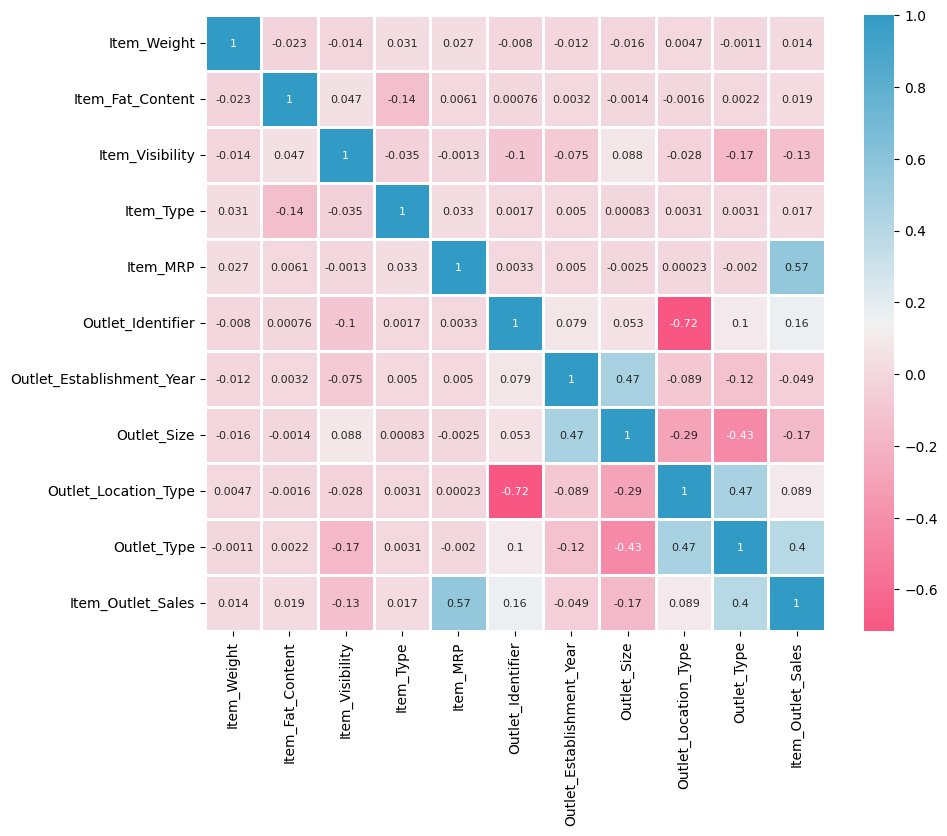

In [ ]:
# Bieu do tuong quan
corr = bigmart.select_dtypes(include='number').corr()
cmap = sns.diverging_palette(0,230,90,60, as_cmap=True)
plt.figure(figsize=(10, 8))

annot_kws = {"size": 8}
sns.heatmap(corr, annot=True, cmap=cmap,linewidths = 1, annot_kws=annot_kws)

In [ ]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
X = bigmart.drop(['Item_Identifier','Outlet_Identifier','Item_Weight', 'Item_Fat_Content', 'Item_Type'],axis=1)
y = bigmart['Item_Outlet_Sales']

In [ ]:
#Chia ngau nhien tap thanh X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [ ]:
# Chuan hoa dl
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# huan luyen mo hinh
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
# train model
linear_regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_test

,Item_Outlet_Sales
4931,1426.1436
4148,1201.7690
7423,1836.2764
4836,2410.8618
944,1549.9824
...,...
5460,2996.1000
7384,2173.1712
1336,1981.4208
8455,4206.5244


In [ ]:
y_train_pred = linear_regression.predict(X_train)
y_train_pred

array([ 661.8052, 1765.7016, 3675.216 , ..., 1438.128 , 3185.1872,
       4544.085 ])

In [ ]:
y_pred = linear_regression.predict(X_test)
y_pred

array([1405.20807402, 1187.9859134 , 1802.26697888, ..., 1942.78457832,
       4096.95805242, 3159.74433867])

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [ ]:
#scores
mae_score = mean_absolute_error(y_test , y_pred)
mse_score = mean_squared_error(y_test , y_pred)
r2score = r2_score(y_test , y_pred)

print(f" Mean Absolute Error: {round(mae_score,2)}\n")
print(f" Squared Mean Squared Error: {round(np.sqrt(mse_score),2)}\n")
print(f" R^2 Score: {round(r2score * 100, 2)} % \n")

print(" R2 trên tập huấn luyện:", r2_score(y_train, y_train_pred))
print(" R2 trên tập kiểm tra:", r2_score(y_test, y_pred))

#sai số trung bình tuyệt đối giữa giá trị thực tế và giá trị dự đoán
# ... bình phương
#... đo lường mức độ mô hình giải thích được phương sai( độ biến thiên) của dữ liệu so với trung bình

 Mean Absolute Error: 52.13

 Squared Mean Squared Error: 72.98

 R^2 Score: 99.83 % 

 R2 trên tập huấn luyện: 1.0
 R2 trên tập kiểm tra: 0.9982510403945838


Text(0, 0.5, 'Giá trị Dự đoán')

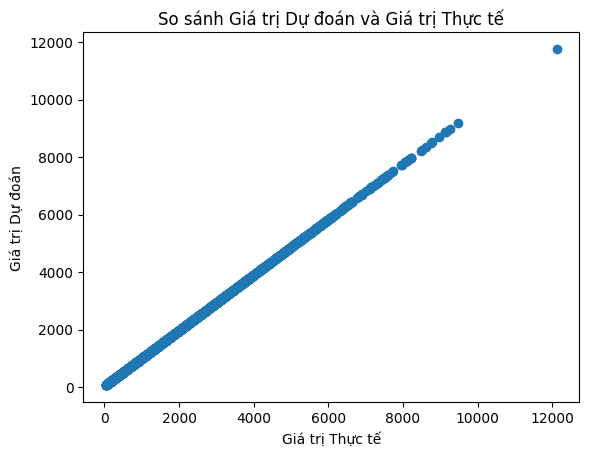

In [ ]:
plt.scatter(y_test, y_pred);
plt.title("So sánh Giá trị Dự đoán và Giá trị Thực tế")
plt.xlabel("Giá trị Thực tế")
plt.ylabel("Giá trị Dự đoán")


In [ ]:
# Chay thuat toan Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
Regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
Regressor.fit(X_train,y_train)

#Là mô hình ensemble dựa trên tập hợp nhiều cây quyết định (decision trees) để đưa ra dự đoán. Kết quả cuối cùng là trung bình của các dự đoán từ các cây.

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_train_pred_1 = Regressor.predict(X_train)
y_train_pred_1

array([ 660.00754, 1765.63502, 3675.08284, ..., 1438.128  , 3185.1872 ,
       4543.15288])

In [ ]:
y_pred_1 = Regressor.predict(X_test)
y_pred_1

array([1404.97116, 1188.1201 , 1798.72528, ..., 1941.53938, 4096.0016 ,
       3162.55   ])

In [ ]:
#scores
mae_score = mean_absolute_error(y_test , y_pred_1)
mse_score = mean_squared_error(y_test , y_pred_1)
r2score = r2_score(y_test , y_pred_1)

print(f" Mean Absolute Error: {round(mae_score,2)}\n")
print(f" Squared Mean Squared Error: {round(np.sqrt(mse_score),2)}\n")
print(f" R^2 Score: {round(r2score * 100, 2)} % \n")

print(" R2 trên tập huấn luyện:", r2_score(y_train, y_train_pred_1))
print(" R2 trên tập kiểm tra:", r2_score(y_test, y_pred_1))


 Mean Absolute Error: 51.72

 Squared Mean Squared Error: 73.55

 R^2 Score: 99.82 % 

 R2 trên tập huấn luyện: 0.9999527379141423
 R2 trên tập kiểm tra: 0.9982233818877166


In [ ]:
# Chạy thuật toán xgboost Regressor
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train, y_train)

#Là một mô hình dựa trên boosting, sử dụng tập hợp các cây quyết định nhỏ và tối ưu hóa chúng bằng cách giảm thiểu lỗi qua từng vòng lặp.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_train_pred_2 = xgb_model.predict(X_train)
y_train_pred_2

array([ 662.6521, 1763.9036, 3685.0835, ..., 1435.6516, 3190.544 ,
       4556.2446], dtype=float32)

In [ ]:
y_pred_2 = xgb_model.predict(X_test)
y_pred_2

array([1410.5659, 1181.1749, 1815.1542, ..., 1942.1465, 4119.063 ,
       3145.572 ], dtype=float32)

In [ ]:
#scores
mae_score = mean_absolute_error(y_test , y_pred_2)
mse_score = mean_squared_error(y_test , y_pred_2)
r2score = r2_score(y_test , y_pred_2)

print(f" Mean Absolute Error: {round(mae_score,2)}\n")
print(f" Squared Mean Squared Error: {round(np.sqrt(mse_score),2)}\n")
print(f" R^2 Score: {round(r2score * 100, 2)} % \n")

print(" R2 trên tập huấn luyện:", r2_score(y_train, y_train_pred_2))
print(" R2 trên tập kiểm tra:", r2_score(y_test, y_pred_2))


 Mean Absolute Error: 55.14

 Squared Mean Squared Error: 100.62

 R^2 Score: 99.67 % 

 R2 trên tập huấn luyện: 0.999986005495954
 R2 trên tập kiểm tra: 0.996675101172509
